## Problem 1
### question a)

#### question (i)

Lets build a baseline method that always predicts the most frequent outcome, which is “not B”.

In [1]:
# we import the data and the package we need. 

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


Letters_train = pd.read_csv("Letters_train.csv")
Letters_train.info()
Letters_train.head()

Letters_test = pd.read_csv("Letters_test.csv")
Letters_test.info()
Letters_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   letter     2181 non-null   object
 1   xbox       2181 non-null   int64 
 2   ybox       2181 non-null   int64 
 3   width      2181 non-null   int64 
 4   height     2181 non-null   int64 
 5   onpix      2181 non-null   int64 
 6   xbar       2181 non-null   int64 
 7   ybar       2181 non-null   int64 
 8   x2bar      2181 non-null   int64 
 9   y2bar      2181 non-null   int64 
 10  xybar      2181 non-null   int64 
 11  x2ybar     2181 non-null   int64 
 12  xy2bar     2181 non-null   int64 
 13  xedge      2181 non-null   int64 
 14  xedgeycor  2181 non-null   int64 
 15  yedge      2181 non-null   int64 
 16  yedgexcor  2181 non-null   int64 
dtypes: int64(16), object(1)
memory usage: 289.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 17 colu

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgeycor,yedge,yedgexcor
0,P,2,3,4,2,1,8,11,4,3,10,4,2,0,9,3,8
1,P,3,4,5,6,4,8,9,3,2,7,8,6,5,10,5,5
2,R,6,9,6,4,4,6,8,3,5,7,4,10,5,8,6,8
3,B,6,9,8,6,8,7,9,6,5,7,5,7,4,7,6,8
4,P,2,1,2,2,1,5,9,3,4,9,8,4,1,9,3,6


In [2]:
# Lets build the baseline model. 

Letter_B_test = Letters_test["letter"]
y_pred_baseline = pd.Series([0 for x in Letter_B_test], index=Letter_B_test.index)
Letter_test_B = pd.Series([1 if x == "B" else 0 for x in Letter_B_test], index=Letter_B_test.index)

# Below is the code for calcultating the accuracy. 

def accuracy(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
    return accuracy

print(" The accuracy of this baseline method on the test set is equal to" , accuracy(Letter_test_B,y_pred_baseline))


 The accuracy of this baseline method on the test set is equal to 0.746524064171123


The accuracy of this baseline method on the test set is equal to 0.75, which means that 75% of the time, the baseline model predicts a good answer (the letter is not B). We can remark that the result is logicical : there is four letters, and each appears randomly 25% of the time. 

#### question (ii)

Lets build the logistic regression model. 



In [3]:
# Below is the code for building a new variable in the training and test datasets called LetterIsB.  
# This variable  should  be  equal  to  1  if the letter is B and equal to 0 otherwise.

Letter_B_train = Letters_train["letter"]
LetterIsB_train = pd.Series([1 if x == "B" else 0 for x in Letter_B_train], index=Letter_B_train.index)
Letters_train['LetterIsB'] = LetterIsB_train
Letters_train.head()

Letter_B_test = Letters_test["letter"]
LetterIsB_test = pd.Series([1 if x == "B" else 0 for x in Letter_B_test], index=Letter_B_test.index)
Letters_test['LetterIsB'] = LetterIsB_test
Letters_test.head()


,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgeycor,yedge,yedgexcor,LetterIsB
0,P,2,3,4,2,1,8,11,4,3,10,4,2,0,9,3,8,0
1,P,3,4,5,6,4,8,9,3,2,7,8,6,5,10,5,5,0
2,R,6,9,6,4,4,6,8,3,5,7,4,10,5,8,6,8,0
3,B,6,9,8,6,8,7,9,6,5,7,5,7,4,7,6,8,1
4,P,2,1,2,2,1,5,9,3,4,9,8,4,1,9,3,6,0


In [4]:
# Below is the code for building a logistic regression model

logistic_model = smf.ols(formula='LetterIsB ~ xbox + ybox + width + height + onpix + xbar + ybar + x2bar + y2bar + xybar + x2ybar + xy2bar + xedge + xedgeycor + yedge + yedgexcor'  ,
                 data=Letters_train).fit()

print(logistic_model.summary())



                            OLS Regression Results                            
Dep. Variable:              LetterIsB   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     163.9
Date:                Mon, 01 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:11:49   Log-Likelihood:                -381.38
No. Observations:                2181   AIC:                             796.8
Df Residuals:                    2164   BIC:                             893.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0375      0.097      0.386      0.7

In [5]:
# Below is the code to calculate the accuracy of the logistic regression model on the test set, using a threshold of p = 0.5

X_test_log = Letters_test.drop(['letter' , 'LetterIsB' ], axis=1)
Letter_test_B = pd.Series([1 if x == "B" else 0 for x in Letter_B_test], index=Letter_B_test.index)

letter_pred_log = logistic_model.predict(X_test_log)
m = len(letter_pred_log)
y_pred_log = [0]*m
for i in range(m) :
    if letter_pred_log[i] >= 0.5 :
            y_pred_log[i] = 1

print(" The accuracy of this logistic regression method on the test set is equal to" , accuracy(Letter_test_B,y_pred_log))  

 The accuracy of this logistic regression method on the test set is equal to 0.9080213903743316


The accuracy of this logistic regression method using a threshold of p = 0.5, on the test set is equal to 0.91, which means that 91% of the time, the logistic regression model predicts a good answer. The accuracy of this logistic regression model is better than the accuracy of the baseline model. 

#### question (iii)

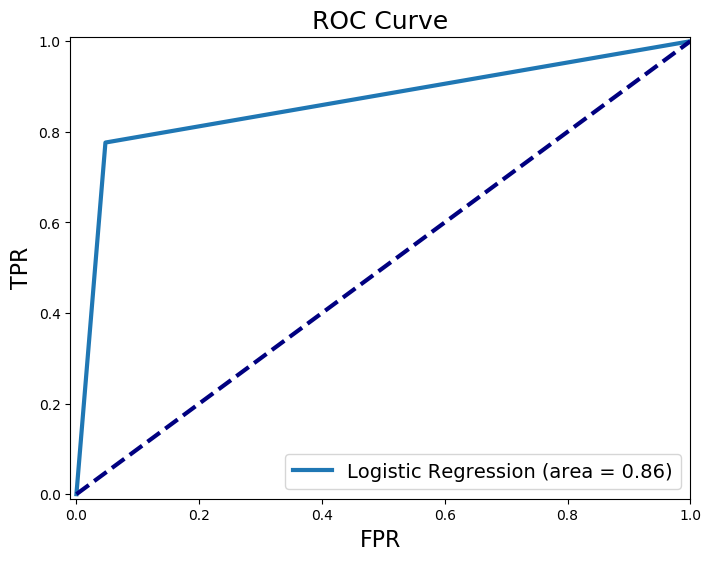

In [6]:
# Below is the code to calculate the AUC of the logistic regression model. 

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(Letter_test_B, y_pred_log)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.legend(loc='lower right', fontsize=14)
plt.show()

The area under the curve (AUC) for the model in the test set is equal to 0.86. A perfect model has an area under the ROC curve equal to 1 and an area under the ROC curve  equal to 0.5 has no discrimination capacity to distinguish between positive class and negative class. Here, the area under the curve is equal to 0.86, which means that there is a 86% chance that the model will be able to distinguish between positive class (the letter is B) and negative class (the letter is not B). The model seems  very good.

#### question (iv)

In [7]:
#below is the code for building the decision tree classifier

from sklearn.tree import DecisionTreeClassifier

X_train_dtc = Letters_train.drop(['letter' , 'LetterIsB' ], axis=1)
Y_train_dtc = Letters_train["LetterIsB"]


dtc = DecisionTreeClassifier(min_samples_leaf=5, 
                             ccp_alpha= 0.000725,
                             criterion = 'gini',
                             random_state = 88)

dtc = dtc.fit(X_train_dtc, Y_train_dtc)


Node count = 91


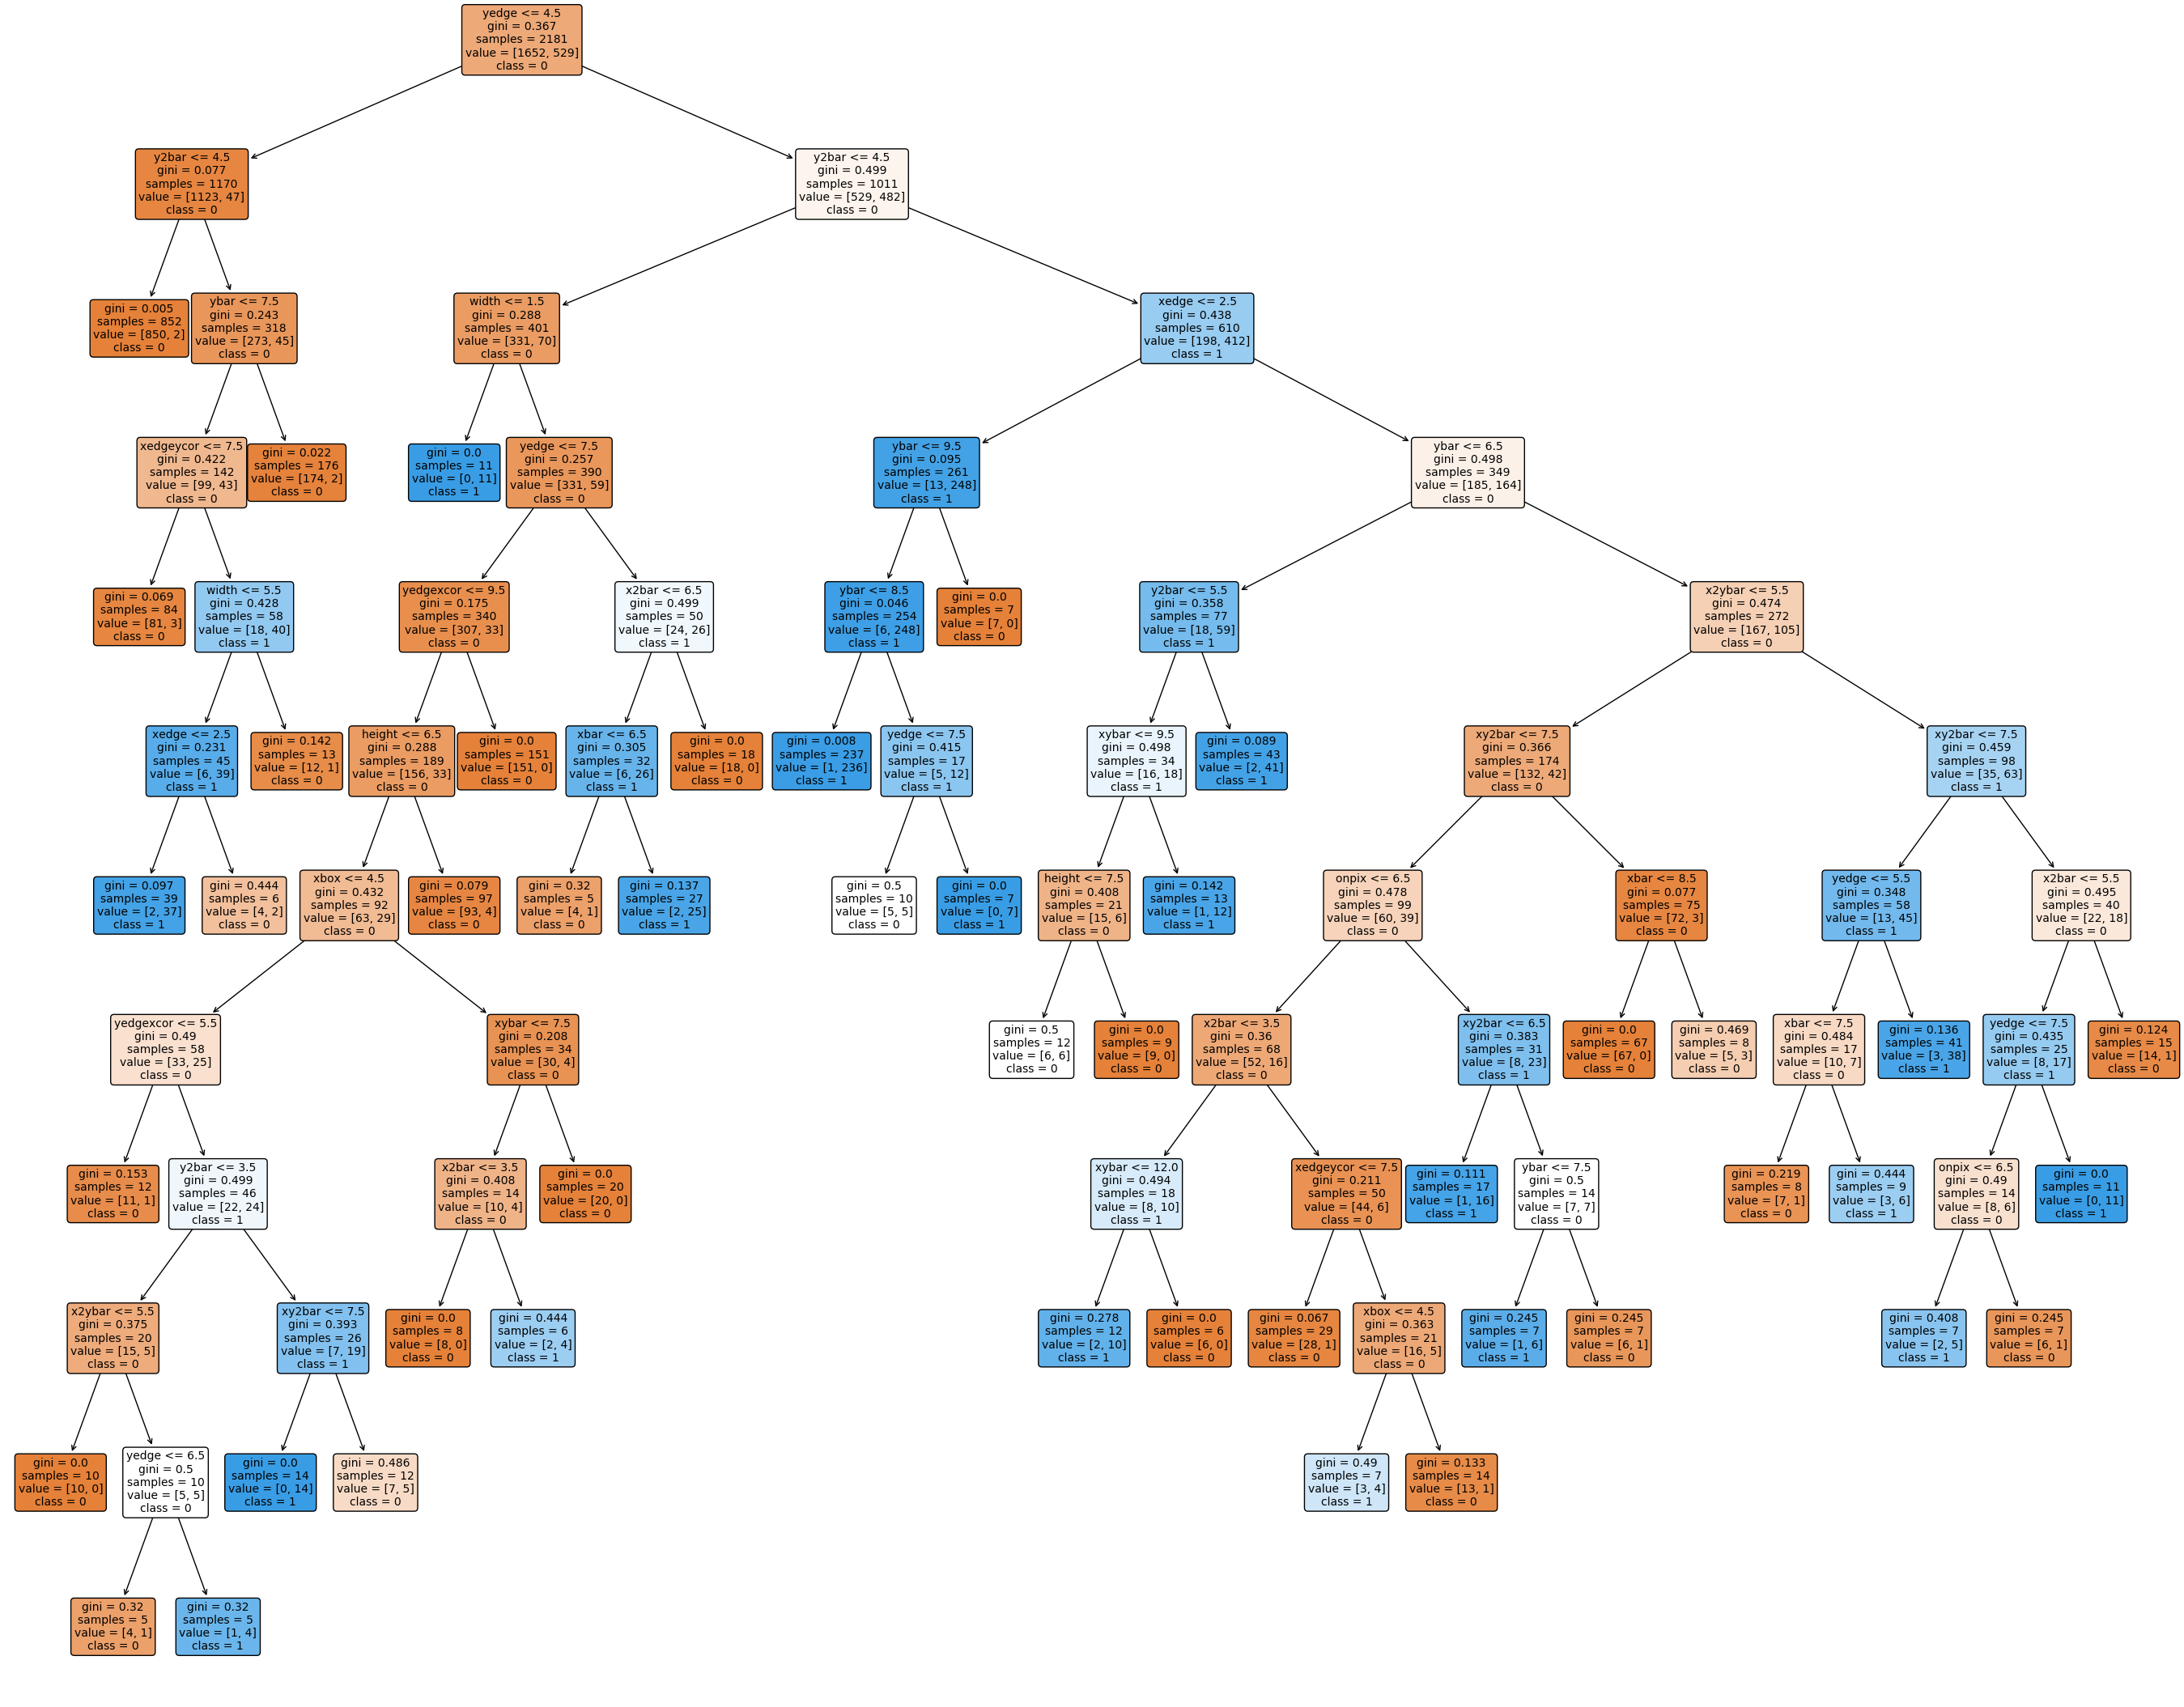

In [8]:
#below is the code for plotting the decision tree classifier and counting the number of nodes. 

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

print('Node count =', dtc.tree_.node_count)
plt.figure(figsize=(25,20))
plot_tree(dtc, 
          feature_names=X_train_dtc.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=10
         ) 
plt.show()

For the cross validation, we consider that false positive and false negative have the same weight in the loss function. 

In [9]:
#Below is the code to do the exhaustive cross-validation. 

from sklearn.model_selection import GridSearchCV

grid_values = {'ccp_alpha': np.linspace(0.0, 0.0050, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'class_weight' : [{ 0: 1 , 1: 1}],
               'random_state': [88]} 
            
dtc = DecisionTreeClassifier()
dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, scoring = 'accuracy', cv=10, verbose=1) 
# default scoring metric to optimize is accuracy, used as default if none given.
dtc_cv_acc.fit(X_train_dtc, Y_train_dtc)

Fitting 10 folds for each of 201 candidates, totalling 2010 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.000e+00, 2.500e-05, 5.000e-05, 7.500e-05, 1.000e-04, 1.250e-04,
       1.500e-04, 1.750e-04, 2.000e-04, 2.250e-04, 2.500e-04, 2.750e-04,
       3.000e-04, 3.250e-04, 3.500e-04, 3.750e-04, 4.000e-04, 4.250e-04,
       4.500e-04, 4.750e-04, 5.000e-04, 5.250e-04, 5.500e-04, 5.750e-04,
       6.000e-04, 6.250e-04, 6.500...
       4.500e-03, 4.525e-03, 4.550e-03, 4.575e-03, 4.600e-03, 4.625e-03,
       4.650e-03, 4.675e-03, 4.700e-03, 4.725e-03, 4.750e-03, 4.775e-03,
       4.800e-03, 4.825e-03, 4.850e-03, 4.875e-03, 4.900e-03, 4.925e-03,
       4.950e-03, 4.975e-03, 5.000e-03]),
                         'class_weight': [{0: 1, 1: 1}], 'max_depth': [30],
                         'min_samples_leaf': [5], 'min_samples_split': [20],
                         'random_state': [88]},
             scoring='accuracy', verbose=1)

In [10]:
# below is the code that calcultates the validation accuracy in terms of ccp alpha. 

from sklearn.model_selection import GridSearchCV

acc = dtc_cv_acc.cv_results_['mean_test_score'] 
# what sklearn calls mean_test_score is the holdout set, i.e. the validation set.
ccp = dtc_cv_acc.cv_results_['param_ccp_alpha'].data

pd.DataFrame({'ccp alpha' : ccp, 'Validation Accuracy': acc}).head(20)



,ccp alpha,Validation Accuracy
0,0,0.934883
1,2.5e-05,0.934883
2,5e-05,0.934883
3,7.5e-05,0.934883
4,0.0001,0.934883
5,0.000125,0.934883
6,0.00015,0.934883
7,0.000175,0.934883
8,0.0002,0.934883
9,0.000225,0.934883


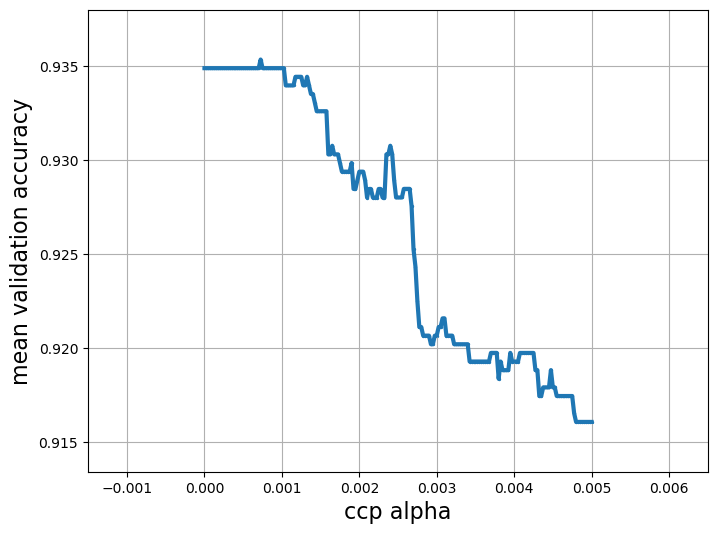

Grid best parameter ccp_alpha (max. accuracy):  0.0007250000000000001
Grid best score (accuracy):  0.9353420468350719


In [11]:
# below is the code that plot the validation accuracy in terms of ccp alpha. 


plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('mean validation accuracy', fontsize=16)
plt.scatter(ccp, acc, s=2)
plt.plot(ccp, acc, linewidth=3)
plt.grid(True, which='both')
plt.show()

print('Grid best parameter ccp_alpha (max. accuracy): ', dtc_cv_acc.best_params_['ccp_alpha'])
print('Grid best score (accuracy): ', dtc_cv_acc.best_score_)

I built a regression tree model using CART algorithm with a complexity parameter first chosen to be equal to 0.005. For the cross validation, we consider that false positive and false negative have the same weight in the loss function. Then, I did an exhausitive cross validation to validate the model and to chose the most adapted value of the complexity parameter. I selected the compelexity parameter value by plotting the mean validation accuracy in terms of the ccp alpha. To have the most adapted model (not overfitted and not underfitted) I chose the complexity parameter value which maximize the mean validation accuracy, that is cpp = 0.000725. I finally changed the ccp value to be equal to 0.000725 in the regression tree model. 

In [12]:
# Below is the code to calculate the accuracy of the CART model on the test set. 

y_pred_dtc = dtc_cv_acc.predict(X_test_log)

print(" The accuracy of this logistic regression method on the test set is equal to" , accuracy(Letter_test_B,y_pred_dtc))  


 The accuracy of this logistic regression method on the test set is equal to 0.9347593582887701


The accuracy of this CART method, on the test set is equal to 0.93, which means that 93% of the time, the CART  model predicts a good answer. The accuracy of this CART model is better than the accuracy of the baseline model and the accuracy of the logistic regression model. 

#### question (v)

In [13]:
#below is the code to build a Random Forest model

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train_dtc, Y_train_dtc)

RandomForestRegressor()

In [14]:
# Below is the code to calculate the accuracy of the random forest model on the test set, using a threshold of p = 0.5

letter_pred_rf = rf.predict(X_test_log)

n = len(letter_pred_rf)
y_pred_rf = [0]*n
for i in range(n) :
    if letter_pred_rf[i] >= 0.5 :
            y_pred_rf[i] = 1

print(" The accuracy of the random forest method on the test set is equal to" , accuracy(Letter_test_B,y_pred_rf))  

 The accuracy of the random forest method on the test set is equal to 0.9732620320855615


The accuracy of this random forest method using a threshold of p = 0.5, on the test set is equal to 0.97, which means that 97% of the time, the random forest model predicts a good answer. The accuracy of this random forest  model is better than the accuracy of the three models we computed. 

#### question (vi)


In [15]:
# below is the code to compare the accuracy of your logistic regression, CART, and Random Forest models.

comparison_data = {'Baseline model': ['{:.3f}'.format(accuracy(Letter_test_B, y_pred_baseline))]  ,  
                    'Logistic Regression': ['{:.3f}'.format(accuracy(Letter_test_B, y_pred_log))],                 
                   'CART model ': ['{:.3f}'.format(accuracy(Letter_test_B, y_pred_dtc))]        ,                       
                   'Random forest model': ['{:.3f}'.format(accuracy(Letter_test_B, y_pred_rf))]}

comparison_table = pd.DataFrame(data=comparison_data, index=['accuracy'])
comparison_table.style.set_properties(**{'font-size': '14pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}])

,Baseline model,Logistic Regression,CART model,Random forest model
accuracy,0.747,0.908,0.935,0.973


The accuracy of the baseline model is the lowest, followed by the accuracy of the logistic regression model. Then, the accuracy of the CART model is better then the accuracy of the baseline model and the logistic regression. Finally, the accuracy of this random forest model is better than the accuracy of the three other models we computed. \
For this application, the accuracy is a lot more important than the interpretabilitity : the most important thing here is to identify the right letter, and not to understand why we identify or not a letter. \
Therefore, the random forest performs best on the test set. 

### question b)

#### question (i)


In [16]:
# below is the code to find the most frequent class over all of the classes in the test set.

Letters = ["A", "B", "P","R"]
frequency = [0]*4

Letter_B_test = Letters_test["letter"]
for x in Letter_B_test:
    for i in range(4):
        if x == Letters[i]:
            frequency[i] += 1
print(frequency)
baseline_value = max(frequency)
print('The most frequent letter that appears is the letter R, which appears' , baseline_value , "times")


[227, 237, 225, 246]
The most frequent letter that appears is the letter R, which appears 246 times


In [17]:
# below is the code to compute the baseline model for the test set

y_pred_base = pd.Series(["R" for x in Letter_B_test], index=Letter_B_test.index)

print( confusion_matrix(Letter_B_test, y_pred_base))
     
# Below is the code for calcultating the accuracy. 

def accuracy_dim4(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = (cm[0][0]+cm[3][3]+cm[2][2]+cm[1][1])/np.sum(cm)
    return accuracy

print(" The accuracy of this baseline model on the test set is equal to" , accuracy_dim4(Letter_B_test,y_pred_base))


[[  0   0   0 227]
 [  0   0   0 237]
 [  0   0   0 225]
 [  0   0   0 246]]
 The accuracy of this baseline model on the test set is equal to 0.2631016042780749


The baseline model on this test set predict the letter "R" everytime.  The accuracy of this baseline model on the test set is equal to 0.26, which means that 26% of the time, the baseline model predicts a good answer. The accuracy of this model is not good.

 #### question (ii)


In [18]:
#below is the code for building the decision tree classifier which predicts letter using the training data

from sklearn.tree import DecisionTreeClassifier

X_train_dtc2 = Letters_train.drop(['letter' , 'LetterIsB' ], axis=1)
Y_train_dtc2 = Letters_train["letter"]


dtc2 = DecisionTreeClassifier(min_samples_leaf=5, 
                             ccp_alpha= 0.00203975,
                             criterion = 'gini',
                             random_state = 88)

dtc2 = dtc2.fit(X_train_dtc2, Y_train_dtc2)


Node count = 73


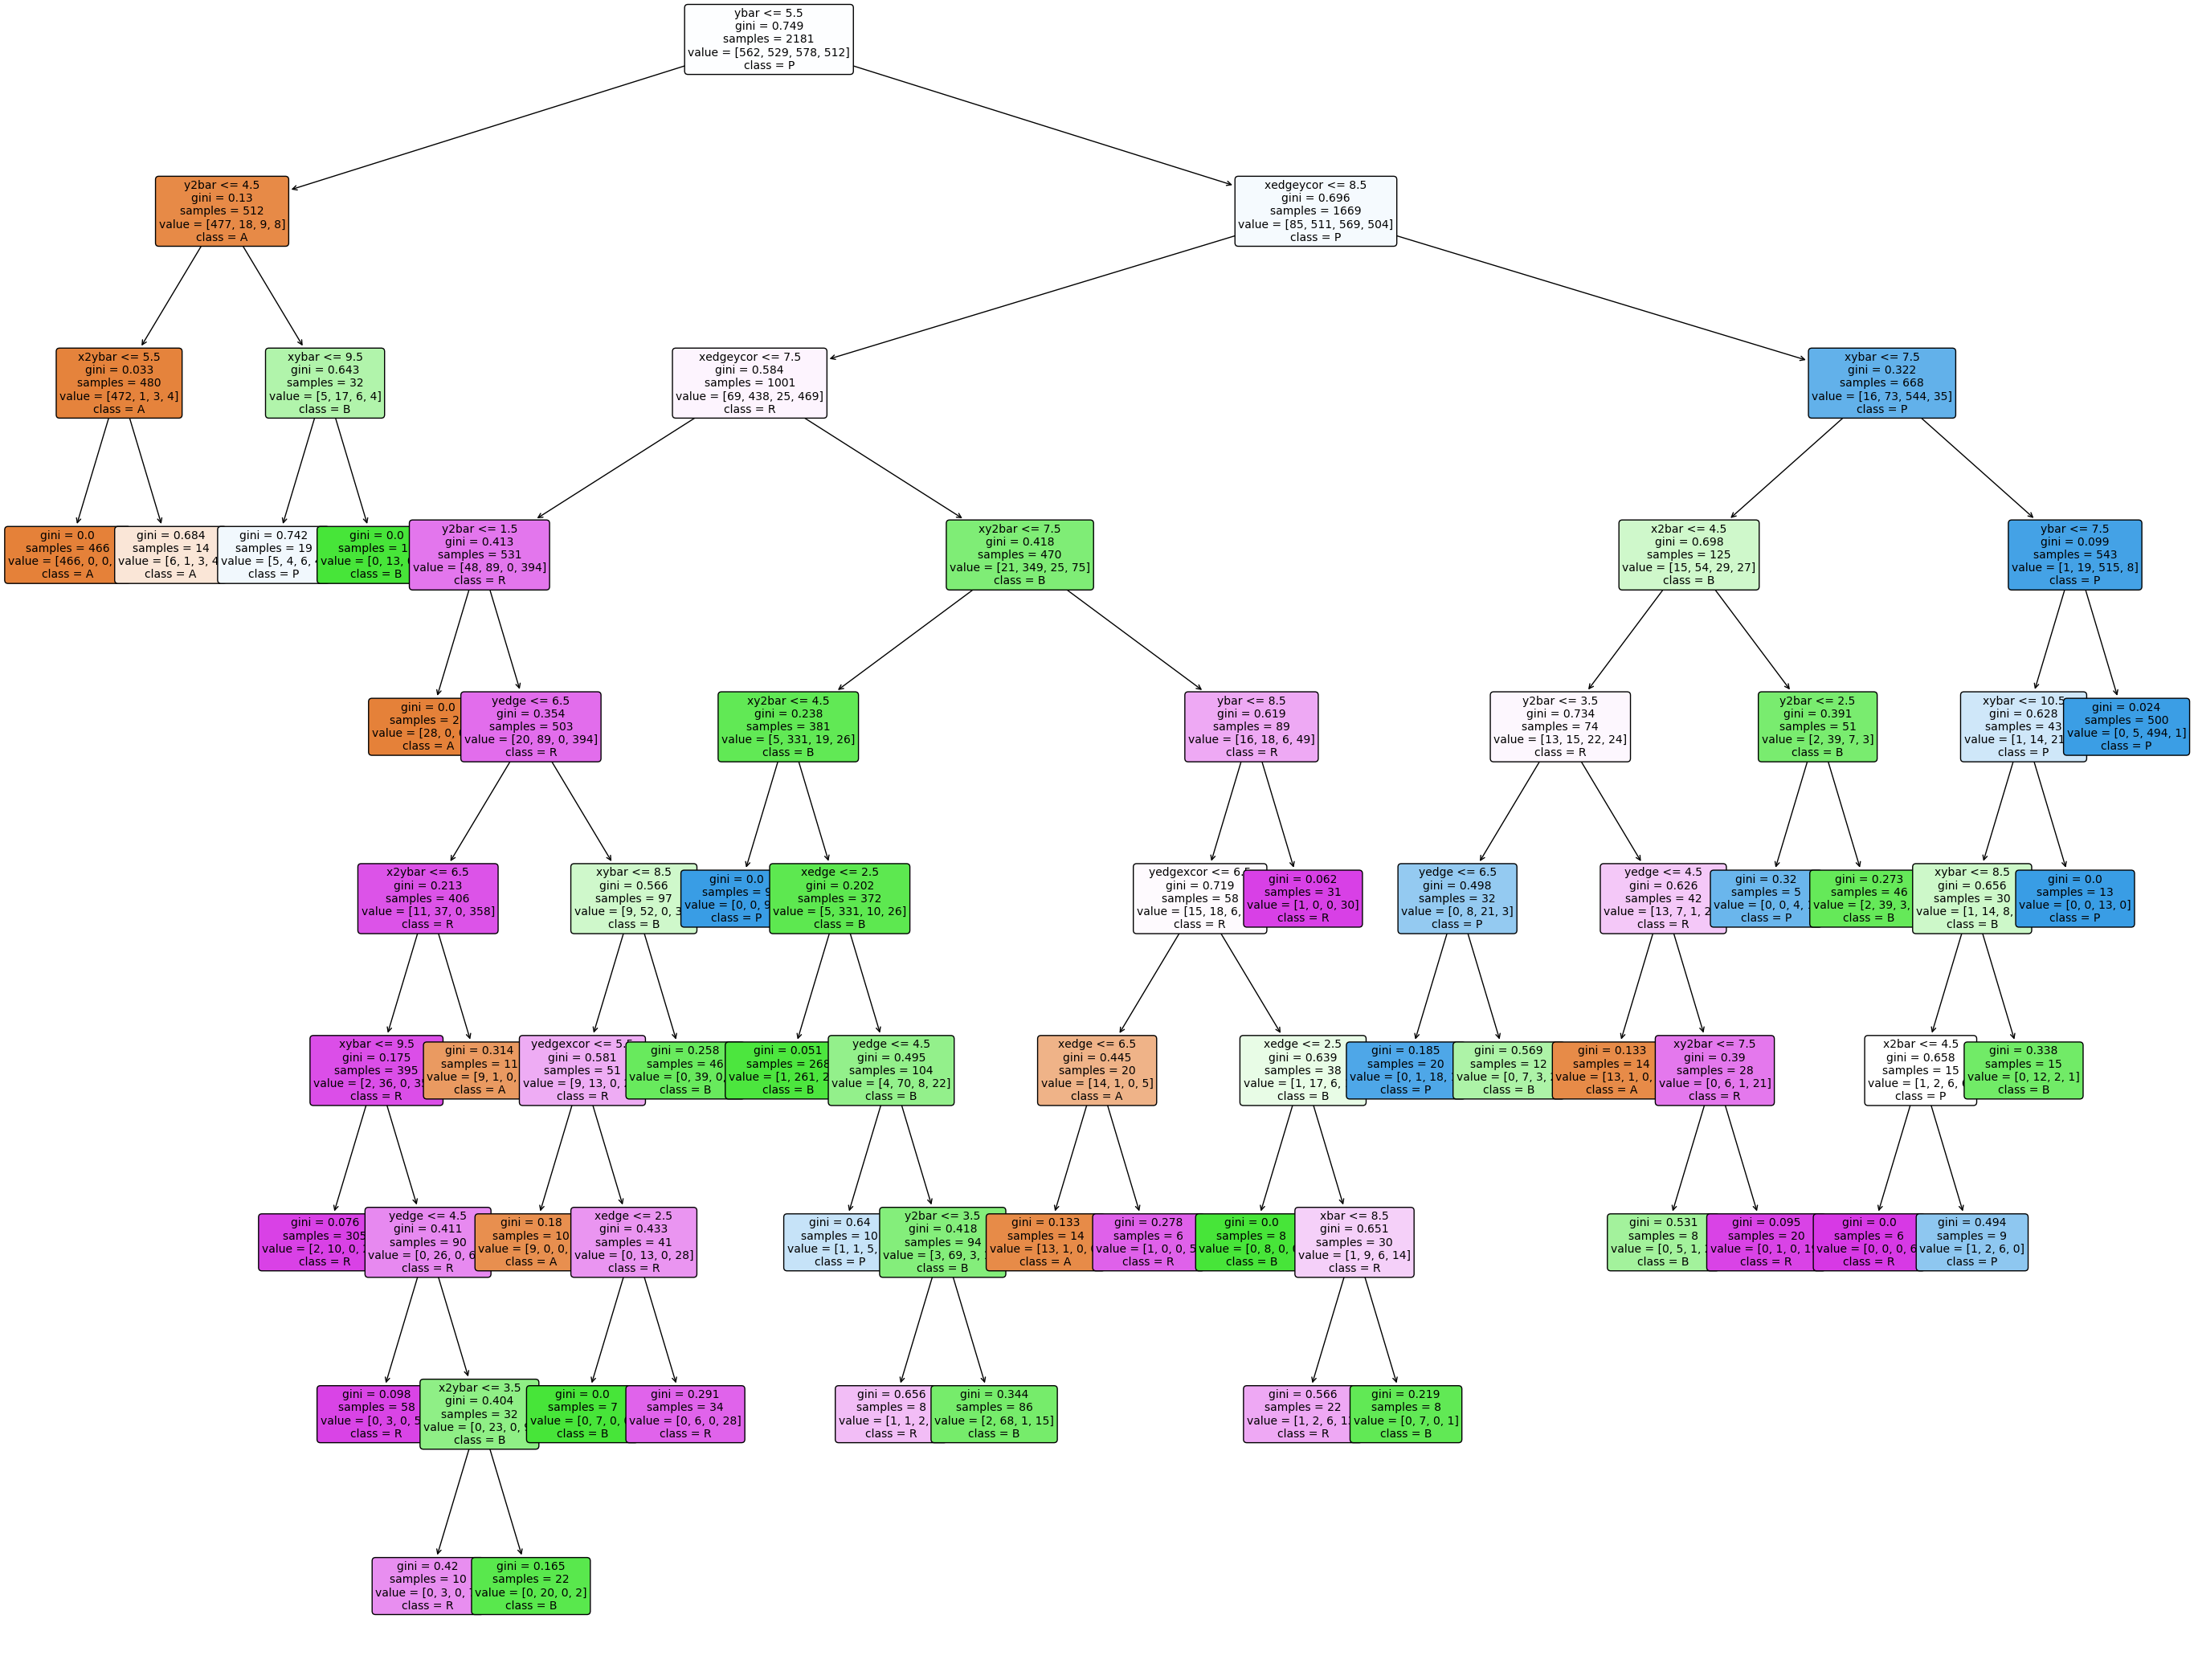

In [19]:
#below is the code for plotting the decision tree classifier and counting the number of nodes. 

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

print('Node count =', dtc2.tree_.node_count)
plt.figure(figsize=(25,20))
plot_tree(dtc2, 
          feature_names=X_train_dtc2.columns, 
          class_names=['A','B',"P","R"], 
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=10
         ) 
plt.show()

For the cross validation, we consider that false positive and false negative have the same weight in the loss function. 

In [20]:
#Below is the code to do the exhaustive cross-validation. 

from sklearn.model_selection import GridSearchCV

grid_values = {'ccp_alpha': np.linspace(0.0, 0.005, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'class_weight' : [{ "A": 1 , "B": 1 , "P" : 1 , "R" : 1}],
               'random_state': [88]} 
            
dtc2 = DecisionTreeClassifier()
dtc_cv_acc2 = GridSearchCV(dtc2, param_grid = grid_values, scoring = 'accuracy', cv=10, verbose=1) 
# default scoring metric to optimize is accuracy, used as default if none given.
dtc_cv_acc2.fit(X_train_dtc2, Y_train_dtc2)

Fitting 10 folds for each of 201 candidates, totalling 2010 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.000e+00, 2.500e-05, 5.000e-05, 7.500e-05, 1.000e-04, 1.250e-04,
       1.500e-04, 1.750e-04, 2.000e-04, 2.250e-04, 2.500e-04, 2.750e-04,
       3.000e-04, 3.250e-04, 3.500e-04, 3.750e-04, 4.000e-04, 4.250e-04,
       4.500e-04, 4.750e-04, 5.000e-04, 5.250e-04, 5.500e-04, 5.750e-04,
       6.000e-04, 6.250e-04, 6.500...
       4.500e-03, 4.525e-03, 4.550e-03, 4.575e-03, 4.600e-03, 4.625e-03,
       4.650e-03, 4.675e-03, 4.700e-03, 4.725e-03, 4.750e-03, 4.775e-03,
       4.800e-03, 4.825e-03, 4.850e-03, 4.875e-03, 4.900e-03, 4.925e-03,
       4.950e-03, 4.975e-03, 5.000e-03]),
                         'class_weight': [{'A': 1, 'B': 1, 'P': 1, 'R': 1}],
                         'max_depth': [30], 'min_samples_leaf': [5],
                         'min_samples_split': [20], 'random_state': [88]},
             scoring='accuracy', verbose=1)

In [21]:
# below is the code that calcultates the validation accuracy in terms of ccp alpha. 

from sklearn.model_selection import GridSearchCV

acc2 = dtc_cv_acc2.cv_results_['mean_test_score'] 
# what sklearn calls mean_test_score is the holdout set, i.e. the validation set.
ccp2 = dtc_cv_acc2.cv_results_['param_ccp_alpha'].data

pd.DataFrame({'ccp alpha' : ccp2, 'Validation Accuracy': acc2}).head(20)



,ccp alpha,Validation Accuracy
0,0,0.897302
1,2.5e-05,0.897302
2,5e-05,0.897302
3,7.5e-05,0.897302
4,0.0001,0.897302
5,0.000125,0.897302
6,0.00015,0.897302
7,0.000175,0.897302
8,0.0002,0.897302
9,0.000225,0.897302


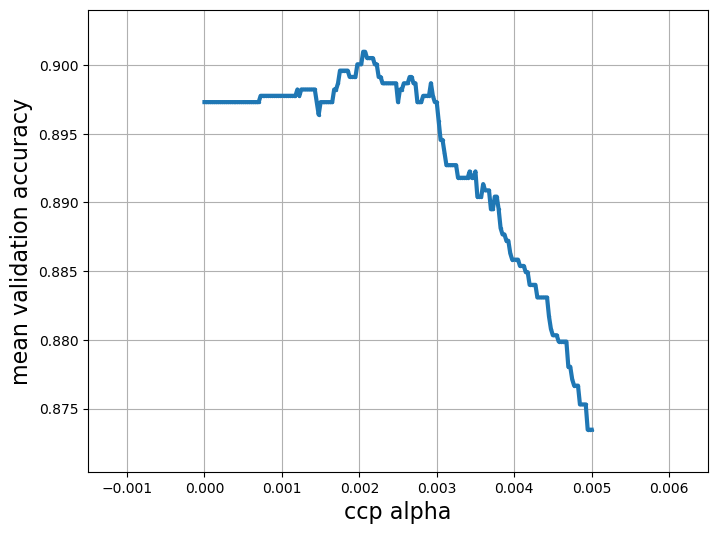

Grid best parameter ccp_alpha (max. accuracy):  0.00205
Grid best score (accuracy):  0.900965606803234


In [22]:
# below is the code that plot the validation accuracy in terms of ccp alpha. 


plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('mean validation accuracy', fontsize=16)
plt.scatter(ccp2, acc2, s=2)
plt.plot(ccp2, acc2, linewidth=3)
plt.grid(True, which='both')
plt.show()

print('Grid best parameter ccp_alpha (max. accuracy): ', dtc_cv_acc2.best_params_['ccp_alpha'])
print('Grid best score (accuracy): ', dtc_cv_acc2.best_score_)

I built a regression tree model using CART algorithm to predict 'letter' using the training data, with a complexity parameter first chosen to be equal to 0.005. For the cross validation, we consider that false positive and false negative have the same weight in the loss function. Then, I did an exhausitive cross validation to validate the model and to chose the most adapted value of the complexity parameter. I selected the compelexity parameter value by plotting the mean validation accuracy in terms of the ccp alpha. To have the most adapted model (not overfitted and not underfitted) I chose the complexity parameter value which maximize the mean validation accuracy, that is cpp = 0.00203975. I finally changed the ccp value to be equal to 0.00203975 in the regression tree model. 

In [23]:
# Below is the code to calculate the accuracy of the CART model on the test set. 

y_pred_dtc2 = dtc_cv_acc2.predict(X_test_log)

print(" The accuracy of this logistic regression method on the test set is equal to" , accuracy_dim4(Letter_B_test,y_pred_dtc2))  

 The accuracy of this logistic regression method on the test set is equal to 0.9165775401069519


The accuracy of this CART method on the test set is equal to 0.92, which means that 92% of the time, the CART model gives a good answer (the model can identify the right letter). The accuracy of this model is very good. 

 #### question (iii)

In [24]:
# Below is the code to build a model for predicting letter using “vanilla” bagging of CART models.
# This can be achieved by setting max features equal to the total number of features (i.e., set m = p) in the RandomForestClassifier package in Python. 
# There is 16 features here.

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler



Letter_train_enc = pd.get_dummies(Letters_train, columns = ['letter'])
Y_train_enc = Letter_train_enc.drop(["xbox","ybox","width","height","onpix","xbar","ybar","x2bar","y2bar","xybar","xy2bar","x2ybar","xedge","xedgeycor","yedge","yedgexcor","LetterIsB"], axis=1)
Y_train_enc.head()

rf2 = RandomForestRegressor(max_features=16)
rf2.fit(X_train_dtc2, Y_train_enc)
Letter_train_enc.head()


,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,...,xy2bar,xedge,xedgeycor,yedge,yedgexcor,LetterIsB,letter_A,letter_B,letter_P,letter_R
0,2,6,4,4,3,8,8,5,7,7,...,6,2,8,6,9,1,0,1,0,0
1,4,8,5,6,4,7,8,6,5,7,...,8,3,7,6,9,0,0,0,0,1
2,4,8,6,6,7,8,7,6,3,7,...,7,6,10,8,9,1,0,1,0,0
3,5,6,7,5,5,8,8,3,5,7,...,8,5,9,4,6,0,1,0,0,0
4,2,5,5,3,3,9,6,3,6,10,...,7,4,7,6,9,1,0,1,0,0


In [25]:
# Below is the code to calculate the accuracy of the random forest model on the test set, using a threshold of p = 0.5

letter_pred_rf2 = rf2.predict(X_test_log)
n2 = len(letter_pred_rf2)
y_pred_rf2 = ["A"]*n2
for i in range(n2) :
    col = np.argmax(letter_pred_rf2[i])
    if col == 0:
        y_pred_rf2[i] = "A"
    if col == 1:
        y_pred_rf2[i] = "B"
    if col == 2:
        y_pred_rf2[i] = "P"
    if col == 3:
        y_pred_rf2[i] = "R"
    
print(" The accuracy of the random forest method on the test set is equal to" , accuracy_dim4(Letter_B_test,y_pred_rf2))  

 The accuracy of the random forest method on the test set is equal to 0.9593582887700535


The test set accuracy of your bagging model is equal to 0.96, which means that 96% of the time, the model gives a good answer (the model can identify the right letter). The accuracy of this model is very good, it is the best we have at this point.

 #### question (iv)

In [26]:
import time

grid_values = {'max_features': np.linspace(1,16,16, dtype='int32'),
              'min_samples_leaf': [5],
              'n_estimators': [500],
              'random_state': [88]} 

tic = time.time()

rf3 = RandomForestRegressor() 
rf_cv = GridSearchCV(rf3, param_grid=grid_values, scoring='r2', cv=5)
rf_cv.fit(X_train_dtc2, Y_train_enc)

toc = time.time()
print('time:', round(toc-tic, 2),'s')

time: 96.35 s


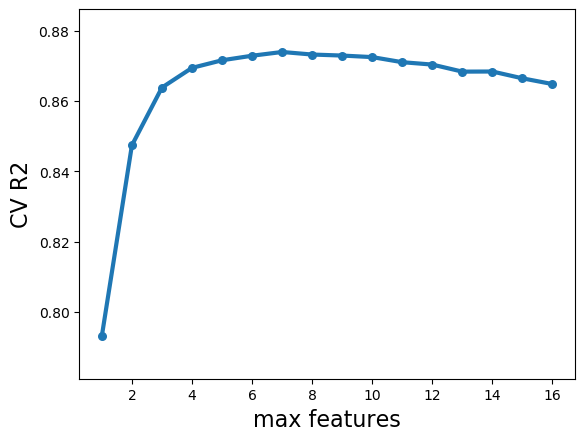

(0.3, 0.6)

In [27]:
max_features = rf_cv.cv_results_['param_max_features'].data
R2_scores = rf_cv.cv_results_['mean_test_score']
plt.xlabel('max features', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(max_features, R2_scores, s=30)
plt.plot(max_features, R2_scores, linewidth=3)
plt.show()
plt.grid(True, which='both')
plt.xlim([1, 19])
plt.ylim([0.3, 0.6])

In [28]:
print(rf_cv.best_params_)

{'max_features': 7, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 88}


I want to built a Random Forest model to predict 'letter' using the training data and using cross validation for selecting the max features value. I selected max feature value by plotting the CV $R^2$ in terms of the value of max features. To have the most adapted model (not overfitted and not underfitted) I chose the complexity parameter value which maximize CV $R^2$, that is max features = 7. 

In [29]:
# below is the code build the random forest model with max features = 7.

rf4 = RandomForestRegressor(max_features=7)
rf4.fit(X_train_dtc2, Y_train_enc)

RandomForestRegressor(max_features=7)

In [30]:
# Below is the code to calculate the accuracy of the random forest model on the test set, using a threshold of p = 0.5

letter_pred_rf4 = rf4.predict(X_test_log)
n4 = len(letter_pred_rf4)
y_pred_rf4 = ["A"]*n4
for i in range(n4) :
    col = np.argmax(letter_pred_rf4[i])
    if col == 0:
        y_pred_rf4[i] = "A"
    if col == 1:
        y_pred_rf4[i] = "B"
    if col == 2:
        y_pred_rf4[i] = "P"
    if col == 3:
        y_pred_rf4[i] = "R"
    
print(" The accuracy of the random forest model on the test set is equal to" , accuracy_dim4(Letter_B_test,y_pred_rf4))  

 The accuracy of the random forest model on the test set is equal to 0.9711229946524064


The test set accuracy of the random forest model is equal to 0.968, which means that 96.8% of the time, the model gives a good answer (the model can identify the right letter). The accuracy of this model is very good, it is the best accuracy we have at this point.

 #### question (v)

In [31]:
# below is the code to apply boosting to this problem using the GradientBoostingClassifier function.

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=3300,
                                max_leaf_nodes=10) 

gbc.fit(X_train_dtc2, Y_train_dtc2)

GradientBoostingClassifier(max_leaf_nodes=10, n_estimators=3300)

In [32]:
# Below is the code to calculate the accuracy of the GradientBoostingClassifier model on the test set.

letter_pred_gbc = gbc.predict(X_test_log)
print(" The accuracy of the random forest method on the test set is equal to" , accuracy_dim4(Letter_B_test,letter_pred_gbc))  


 The accuracy of the random forest method on the test set is equal to 0.9754010695187165


The test set accuracy of the GradientBoostingClassifier model is equal to 0.975, which means that 97.5% of the time, the model gives a good answer (the model can identify the right letter). The accuracy of this model is excellent, it is the best accuracy we have at this point.

### question c)

In [33]:
# below is the code to compare the accuracy of the baseline, CART, bagging, Random Forest, and boosting models from part (b).

comparison_data = {'Baseline model': ['{:.3f}'.format(accuracy_dim4(Letter_B_test,y_pred_base))]  ,                  
                   'CART model ': ['{:.3f}'.format(accuracy_dim4(Letter_B_test,y_pred_dtc2))]        ,  
                   'Bagging model ' : ['{:.3f}'.format(accuracy_dim4(Letter_B_test,y_pred_rf2))]  ,
                   'Random forest model': ['{:.3f}'.format(accuracy_dim4(Letter_B_test,y_pred_rf4))] ,
                   'Boosting model': ['{:.3f}'.format(accuracy_dim4(Letter_B_test,letter_pred_gbc))] }

comparison_table = pd.DataFrame(data=comparison_data, index=['accuracy'])
comparison_table.style.set_properties(**{'font-size': '14pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}])

,Baseline model,CART model,Bagging model,Random forest model,Boosting model
accuracy,0.263,0.917,0.959,0.971,0.975


The accuracy of the baseline model is from far the lowest. 
The accuracy of the CART, bagging, Random Forest, and boosting models are greater than 90% which is very good. 
The CART model has the lowest accuracy after the baseline model. Then, the accuracy of the bagging model is the higher than the accuracy of the CART model and lower than the accuracy of the random forest model.
Finally, the accuracy of this boosting model is the best.


I will use the bootstrap on the accuracy to test which model performs best. 

(5000,)


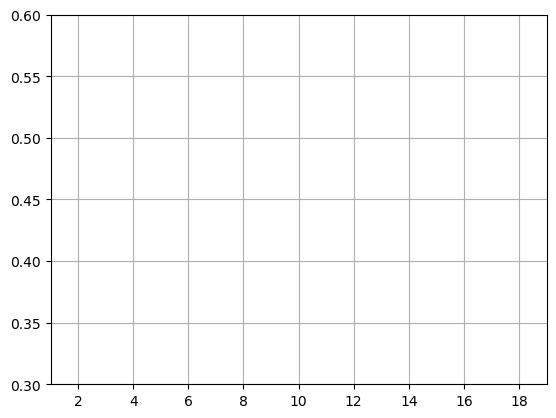

<Figure size 640x480 with 0 Axes>

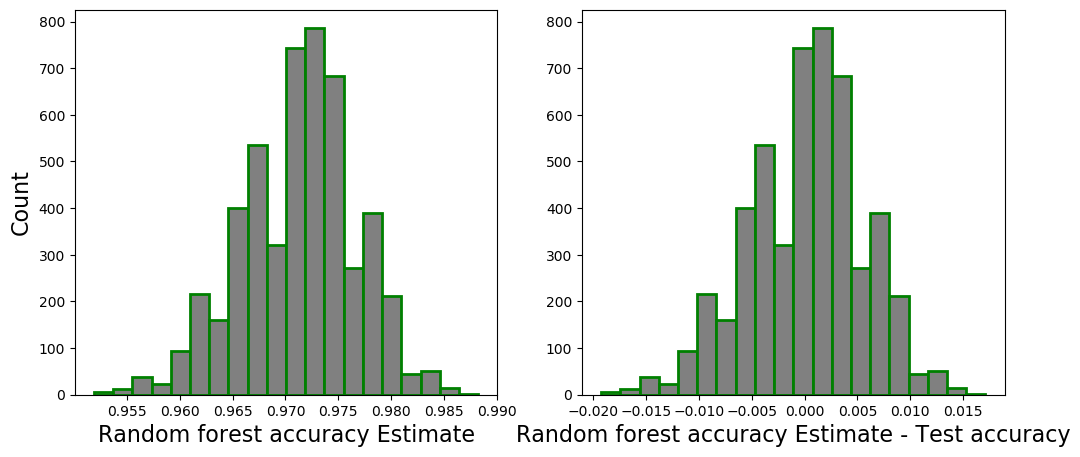

The 95-percent confidence interval of accuracy of the random forest is [-0.01069519  0.00962567]


In [34]:
# below is the code to use bootstrap on random forest model. 

import time
#below is a manual implementation of bootstrap for model valiation for random forest model.
def bootstrap_validation_RF(test_data, test_label, train_label, model, metrics, sample=500, random_state=66):
    tic = time.time()
    n_sample = sample
    output_array=np.zeros(n_sample)
    output_array[:]=np.nan
    print(output_array.shape)
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
        bs_predicted = model.predict(bs_data)
        n = len(bs_predicted)
        y_pred = ["A"]*n
        for i in range(n) :
            col = np.argmax(bs_predicted[i])
            if col == 0:
                y_pred[i] = "A"
            if col == 1:
                y_pred[i] = "B"
            if col == 2:
                y_pred[i] = "P"
            if col == 3:
                y_pred[i] = "R"
        output_array[bs_iter]=metrics(y_pred,bs_label)
#       acc2if bs_iter % 100 == 0:
#             print(bs_iter, time.time()-tic)
    output_df = pd.DataFrame(output_array)
    return output_df

bs_output = bootstrap_validation(X_test,y_test,y_train,rf,
                                 metrics_list=[OS_R_squared, mean_squared_error,mean_absolute_error],
                                 sample = 5000)


# Basic plot and centered plot
plt.figure()
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Random forest accuracy Estimate', fontsize=16)
axs[1].set_xlabel('Random forest accuracy Estimate - Test accuracy', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output_RF.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].hist(bs_output_RF.iloc[:,0]-test_accuracy_RF, bins=20,edgecolor='green', linewidth=2,color = "grey")
plt.show()

# The 95% confidence interval of the random forest model. 
CI_RF= np.quantile(bs_output_RF.iloc[:,0]-test_accuracy_RF,np.array([0.025,0.975]))
print("The 95-percent confidence interval of accuracy of the random forest is %s" % CI_RF)

(5000,)


<Figure size 640x480 with 0 Axes>

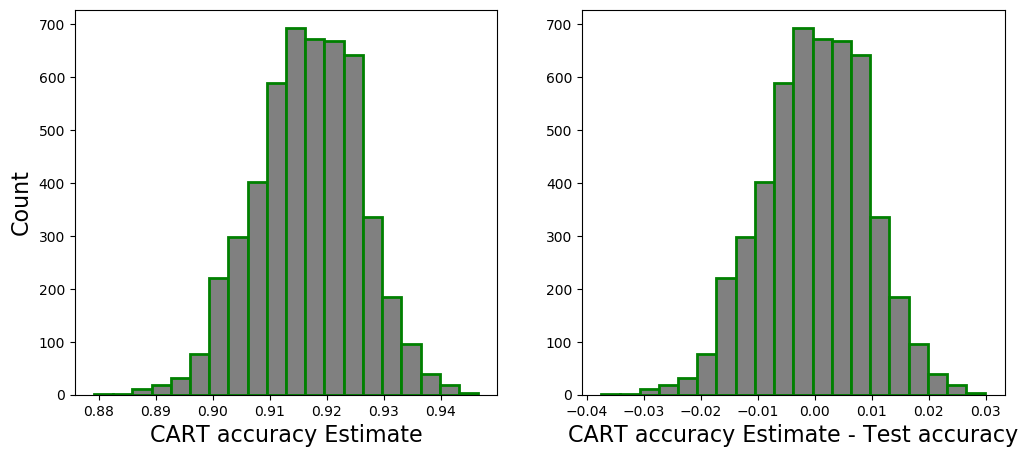

The 95-percent confidence interval of accuracy of the CART model is [-0.01818182  0.0171123 ]


In [35]:
# below is the code to use bootstrap on CART model. 

import time
#below is a manual implementation of bootstrap for model valiation for CART model.
def bootstrap_validation_CART(test_data, test_label, train_label, model, metrics, sample=500, random_state=66):
    tic = time.time()
    n_sample = sample
    output_array=np.zeros(n_sample)
    output_array[:]=np.nan
    print(output_array.shape)
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
        bs_predicted = model.predict(bs_data)
        output_array[bs_iter]=metrics(bs_predicted,bs_label)
#       acc2if bs_iter % 100 == 0:
#             print(bs_iter, time.time()-tic)
    output_df = pd.DataFrame(output_array)
    return output_df

bs_output_CART = bootstrap_validation_CART(X_test_log,Letter_B_test,Y_train_dtc2,dtc_cv_acc2,
                                 metrics=accuracy_dim4,
                                 sample = 5000)

test_accuracy_CART = accuracy_dim4(Letter_B_test,y_pred_dtc2)

# Basic plot and centered plot
plt.figure()
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('CART accuracy Estimate', fontsize=16)
axs[1].set_xlabel('CART accuracy Estimate - Test accuracy', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output_CART.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].hist(bs_output_CART.iloc[:,0]-test_accuracy_CART, bins=20,edgecolor='green', linewidth=2,color = "grey")
plt.show()

# The 95% confidence interval of the CART model. 
CI_CART= np.quantile(bs_output_CART.iloc[:,0]-test_accuracy_CART,np.array([0.025,0.975]))
print("The 95-percent confidence interval of accuracy of the CART model is %s" % CI_CART)

(5000,)


<Figure size 640x480 with 0 Axes>

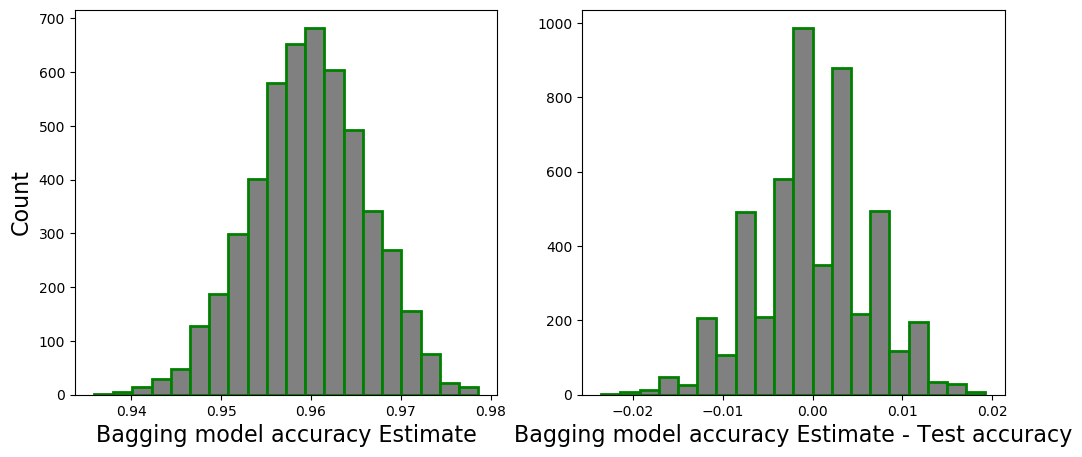

The 95-percent confidence interval of accuracy of the bagging model is [-0.01283422  0.01176471]


In [36]:
# below is the code to use bootstrap on bagging model. 

bs_output_bag = bootstrap_validation_RF(X_test_log,Letter_B_test,Y_train_enc,rf2,
                                 metrics=accuracy_dim4,
                                 sample = 5000)

test_accuracy_bag = accuracy_dim4(Letter_B_test,y_pred_rf2)

# Basic plot and centered plot
plt.figure()
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bagging model accuracy Estimate', fontsize=16)
axs[1].set_xlabel('Bagging model accuracy Estimate - Test accuracy', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output_bag.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].hist(bs_output_bag.iloc[:,0]-test_accuracy_bag, bins=20,edgecolor='green', linewidth=2,color = "grey")
plt.show()

# The 95% confidence interval of the random forest model. 
CI_bag= np.quantile(bs_output_bag.iloc[:,0]-test_accuracy_bag,np.array([0.025,0.975]))
print("The 95-percent confidence interval of accuracy of the bagging model is %s" % CI_bag)

(5000,)


<Figure size 640x480 with 0 Axes>

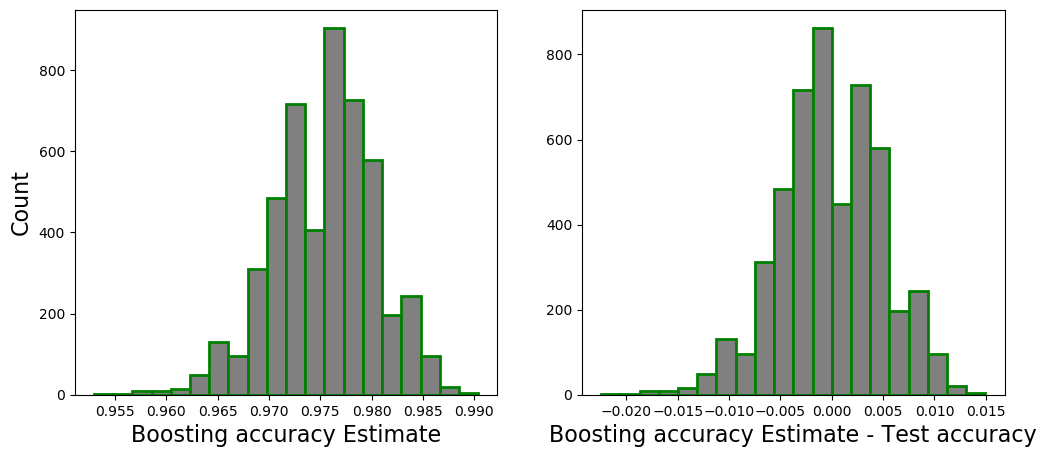

The 95-percent confidence interval of accuracy of the boosting model is [-0.01069519  0.00855615]


In [37]:
# below is the code to use bootstrap on boosting model. 


bs_output_boost = bootstrap_validation_CART(X_test_log,Letter_B_test,Y_train_dtc2,gbc,
                                 metrics=accuracy_dim4,
                                 sample = 5000)

test_accuracy_boost = accuracy_dim4(Letter_B_test,letter_pred_gbc)

# Basic plot and centered plot
plt.figure()
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Boosting accuracy Estimate', fontsize=16)
axs[1].set_xlabel('Boosting accuracy Estimate - Test accuracy', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output_boost.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].hist(bs_output_boost.iloc[:,0]-test_accuracy_boost, bins=20,edgecolor='green', linewidth=2,color = "grey")
plt.show()

# The 95% confidence interval of the boosting model. 
CI_boost= np.quantile(bs_output_boost.iloc[:,0]-test_accuracy_boost,np.array([0.025,0.975]))
print("The 95-percent confidence interval of accuracy of the boosting model is %s" % CI_boost)

In [38]:
# below is the code to compare the accuracy and the confidence interval of the baseline, CART, bagging, Random Forest, and boosting models from part (b).

comparison_data_ac = {'Baseline model': ['{:.3f}'.format(accuracy_dim4(Letter_B_test,y_pred_base))]  ,                  
                   'CART model ': ['{:.3f}'.format(accuracy_dim4(Letter_B_test,y_pred_dtc2))]        ,  
                   'Bagging model ' : ['{:.3f}'.format(accuracy_dim4(Letter_B_test,y_pred_rf2))]  ,
                   'Random forest model': ['{:.3f}'.format(accuracy_dim4(Letter_B_test,y_pred_rf4))] ,
                   'Boosting model': ['{:.3f}'.format(accuracy_dim4(Letter_B_test,letter_pred_gbc))] }

comparison_table_ac = pd.DataFrame(data=comparison_data_ac, index=['accuracy'])
comparison_table_ac.style.set_properties(**{'font-size': '14pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}])




,Baseline model,CART model,Bagging model,Random forest model,Boosting model
accuracy,0.263,0.917,0.959,0.971,0.975


In [39]:
comparison_data_ci = {   'CART model ': [CI_CART]        ,  
                  'Bagging model ' : [CI_bag]  ,
                  'Random forest model': [CI_RF] ,
                  'Boosting model': [CI_boost] }

comparison_table_ci = pd.DataFrame(data=comparison_data_ci, index=['confidence interval'])
comparison_table_ci.style.set_properties(**{'font-size': '14pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}])

,CART model,Bagging model,Random forest model,Boosting model
confidence interval,[-0.01818182 0.0171123 ],[-0.01283422 0.01176471],[-0.01069519 0.00962567],[-0.01069519 0.00855615]


For this model, I will recommend the model with the highest accuracy and with the smallest centered confidence interval.
Judging just on the accuracy, I will choose the random forest model or the boosting model because their accuracies are very high (over 97%).

To choose which model I will recommend between these two models, I look at their confidence interval. The boosting model has a confidence interval a bit smaller than the interval confidence of the random forest model. 

The boosting model is also the model with the best accuracy. So, if it is not necessary to limit the time of computation (boosting takes more time to compute than random forest) and as the interpretability is not a decisive factor in this problem, I will recommend to use the bagging model. 